In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [14]:
img = cv2.imread("/media/aiteam/DataAI/depth_datasets/oxford/2014-12-16-18-44-24/rgb/1418755784924817.png")[...,::-1]

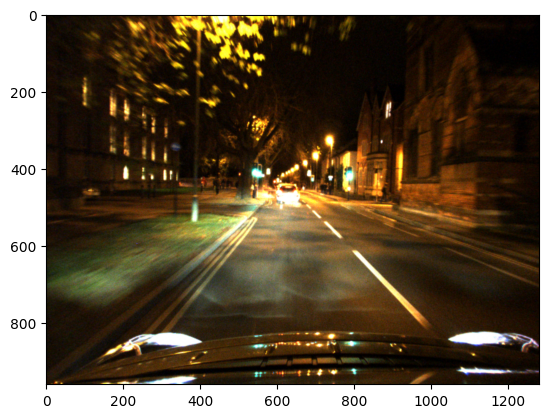

In [15]:
plt.imshow(img)

In [16]:
class CenterCrop:
    """
    Center crop a given image
    """

    def __init__(self, *size):
        """
        Initialize
        :param width: crop width
        :param height: crop height
        """
        self.w, self.h = size

    def __call__(self, *imgs, inplace=False, unpack=True):
        """
        Process
        :param imgs: 'channel last' images to process
        :param inplace: whether to process image in place
        :param unpack:
        :return:
        """
        # assert
        assert len(imgs) > 0
        # shape
        h, w = imgs[0].shape[:2]
        # h range
        h_start = max((w - self.w) // 2, 0)
        h_end = min(h_start + self.w, w)
        # v range
        v_start = max((h - self.h) // 2, 0)
        v_end = min(v_start + self.h, h)
        # store results
        results = []
        # process others
        for img in imgs:
            # img result
            if inplace:
                img_result = img[v_start: v_end, h_start: h_end]
            else:
                img_result = img[v_start: v_end, h_start: h_end].copy()
            # append to result
            results.append(img_result)
        # handle results
        if unpack and len(results) == 1:
            results = results[0]
        # return
        return results


In [17]:
_CROP_SIZE = (1152, 640)
crop = CenterCrop(*_CROP_SIZE)


In [18]:
img_crop = crop(img)

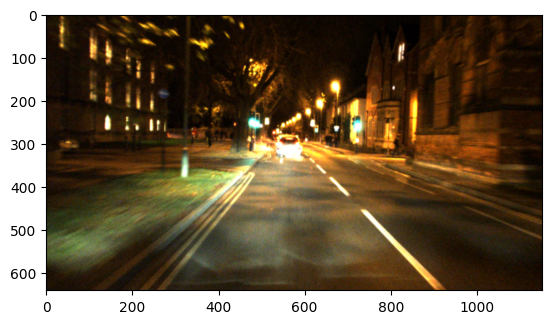

In [19]:
plt.imshow(img_crop)

In [21]:
img_resized = cv2.resize(img_crop, (512,256)) 

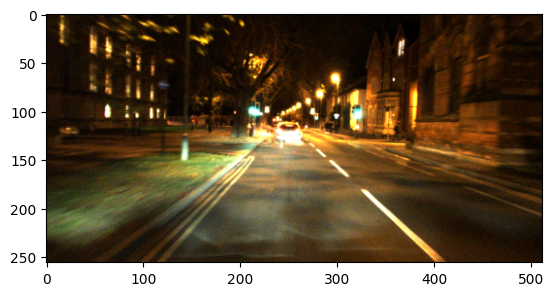

In [22]:
plt.imshow(img_resized)

In [23]:
cv2.imwrite("test.jpg", img_resized[...,::-1])

True

In [32]:
def remove_lines(filename1, filename2):
    with open(filename1, 'r') as file1, open(filename2, 'r') as file2:
        lines_to_keep = []
        last_components = [line.strip().split('/')[-1] for line in file1]
        file2_lines = file2.readlines()
        for i, line in enumerate(file2_lines):
            if not any(last_component in line for last_component in last_components):
                lines_to_keep.append(i)
        file1.close()
        file2.close()
        
    print(len(lines_to_keep))
    with open(filename2, 'w') as file2:
        for i, line in enumerate(file2_lines):
            if i in lines_to_keep:
                file2.write(line)
        file2.close()


In [34]:
filename1 = "/media/aiteam/DataAI/Night-Depth-GRL/monodepth2/splits/oxford_night/val_night_files.txt"
filename2 = "/media/aiteam/DataAI/Night-Depth-GRL/monodepth2/splits/oxford_night/train_all_files.txt"
remove_lines(filename1, filename2)

31882
